In [24]:
import spacy
from scattertext import SampleCorpora, whitespace_nlp_with_sentences
from scattertext import produce_scattertext_explorer
from scattertext.CorpusFromPandas import CorpusFromPandas
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import unicodedata
import nltk
from wordcloud import WordCloud, STOPWORDS
from os import path
from scipy.misc import imread
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Import CSV

In [25]:
df = pd.read_csv("./finestse.csv", sep=',', 
                 encoding = 'utf8', header=None, 
                 names=["caption", "comments","tags"])
df.head()

,caption,comments,tags
0,Stort grattis till Andrea Norrman som fyller 2...,👏👏👏 😍😍 Do You Love Tropical Music? Ge Lina Dol...,birthday inspo birthdaygirl lifestylepublishin...
1,Hej Paris! 🗼 Följ Stefanis drömmiga resa på bl...,😍😘,inspo resa glädje travel lifestylepublishing b...
2,Här har vi @amandafranzeen som bloggar på Fine...,Jag har en blogg hos er :) @finestse,inspo fotboll lifestylepublishing vscocam tumb...
3,Söndagar 😍👌 Tagga någon du vill äta pannkakor ...,@feliciabellonius 😍😍😍 😌 @strandlinnea 👌👌👏,inspo lifestylepublishing pannkakor vscocam su...
4,Se alla bilder från Formex Afterwork med Lifes...,Sweet (: 👍👍👍,inspo blog vimmel lifestylepublishing finestse...


In [26]:
df.describe()

,caption,comments,tags
count,140,104,139
unique,140,102,139
top,Idag hade vi besök av fina @isabellajedler på ...,nice,jagärfinest lifestyle horselove ryttare world ...
freq,1,2,1


## Count the tag frequency and plot the 5 most common tags (user tags in post)

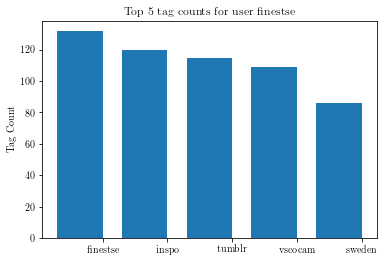

In [27]:
tagsDF = df["tags"]
tags = []
# Merge the DF into a single list with all the tags
for index, row in df.iterrows():
    if type(row["tags"]) != float: #Remove emojis
        tags = tags + map(lambda x: x.decode("utf-8"), row["tags"].encode("utf-8").split(" "))
# Count the tags
counter = Counter(tags)
top_tags = []
top_counts = []
for tag, count in counter.most_common(5):
    top_tags.append(tag)
    top_counts.append(count)
# Plot the counts
indexes = np.arange(len(top_tags))
width = 0.7
plt.bar(indexes, top_counts, width)
plt.xticks(indexes + width * 0.5, top_tags)
plt.ylabel('Tag Count')
plt.title('Top 5 tag counts for user finestse')
plt.show()

In [28]:
map(lambda x: x.encode("utf-8"), top_tags)

['finestse', 'inspo', 'tumblr', 'vscocam', 'sweden']

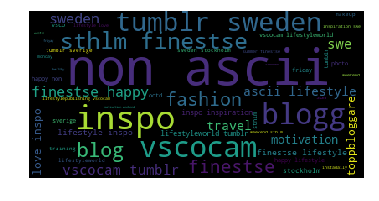

In [36]:
def mapUnicode(x):
    try:
        return x.encode("ascii")
    except:
          return "non-ascii"
tagsStr = " ".join(map(mapUnicode, tags))
wordcloud = WordCloud(
                      relative_scaling = 1.0
                      ).generate(tagsStr)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Count the word frequency in comments and plot the 5 most common words

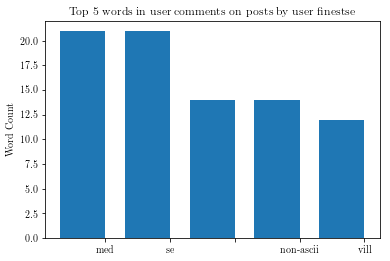

In [30]:
commentsDF = df["comments"]
words = []
# Merge the DF into a single list with all the comments
for index, row in df.iterrows():
    if type(row["comments"]) == unicode: #remove emojis
        words = words + map(lambda x: x.decode("utf-8"), row["comments"].encode("utf-8").split(" "))
# Count the words
counter = Counter(words)
top_words= []
top_counts = []
for word, count in counter.most_common(5):
    top_words.append(word)
    top_counts.append(count)

def mapUnicode(x):
    try:
        return x.encode("ascii")
    except:
          return "non-ascii"
unicode_top_words = top_words
top_words = map(mapUnicode, top_words)
# Plot the counts
indexes = np.arange(len(top_words))
width = 0.7
plt.bar(indexes, top_counts, width)
plt.xticks(indexes + width * 0.5, top_words)
plt.ylabel('Word Count')
plt.title('Top 5 words in user comments on posts by user finestse')
plt.show()

In [31]:
for x in unicode_top_words:
    print(x.encode("utf-8"))

med
se

😍
vill


The most common words are swedish stop words, the empty word "", and the emoji with heart-eyes. 

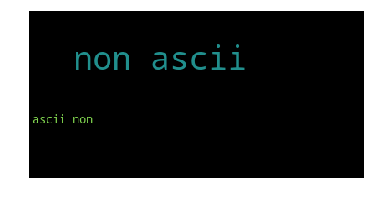

In [37]:
commentsStr = " ".join(map(mapUnicode, words))
wordcloud = WordCloud(
                      relative_scaling = 1.0
                      ).generate(commentsStr)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Count the word frequency in captions and plot the 5 most common words

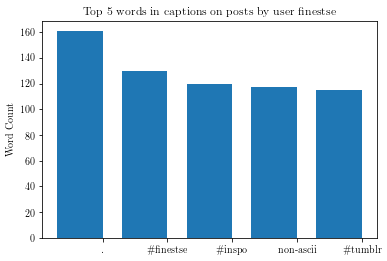

In [38]:
commentsDF = df["caption"]
words = []
# Merge the DF into a single list with all the captions
for index, row in df.iterrows():
    if type(row["caption"]) == unicode: #remove emojis
        words = words + map(lambda x: x.decode("utf-8"), row["caption"].encode("utf-8").split(" "))
# Count the words
counter = Counter(words)
top_words= []
top_counts = []
for word, count in counter.most_common(5):
    top_words.append(word)
    top_counts.append(count)

def mapUnicode(x):
    try:
        return x.encode("ascii")
    except:
          return "non-ascii"
unicode_top_words = top_words
top_words = map(mapUnicode, top_words)
top_words = map(lambda x: x.replace("#","\#"), top_words)
# Plot the counts
indexes = np.arange(len(top_words))
width = 0.7
plt.bar(indexes, top_counts, width)
plt.xticks(indexes + width * 0.5, top_words)
plt.ylabel('Word Count')
plt.title('Top 5 words in captions on posts by user finestse')
plt.show()

In [39]:
for x in unicode_top_words:
    print(x.encode("utf-8"))

.
#finestse
#inspo
på
#tumblr


Most common words are tags and swedish stopwords ("på")

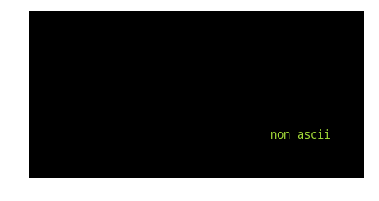

In [40]:
captionsStr = " ".join(map(mapUnicode, words))
wordcloud = WordCloud(
                      relative_scaling = 1.0
                      ).generate(captionsStr)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()